# Django 05 ORM with view

## ORM with view


### Django shell에서 연습했던
QuerySet API를 직접 view 함수에서 사용하기

## Read

### 2가지 Read(조회) 진행
2. 단일 게시글 조회

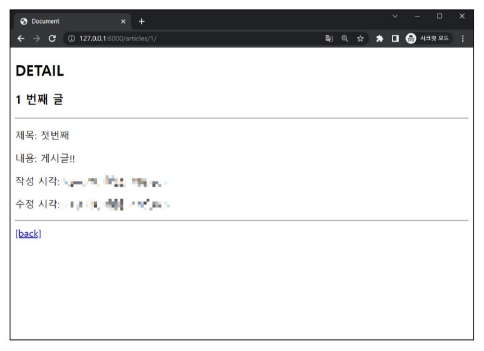

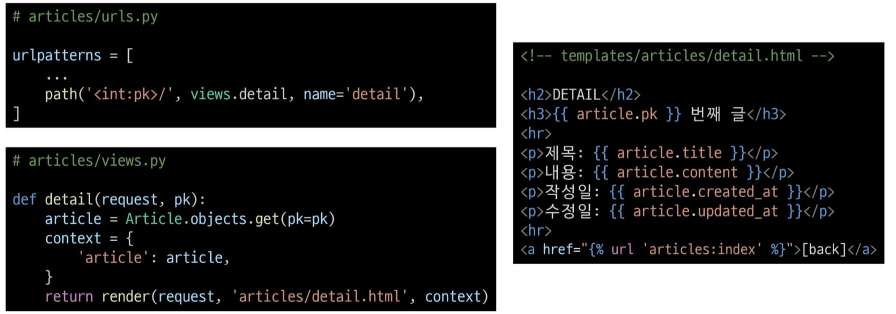

- 단일 게시글 페이지 링크 작성

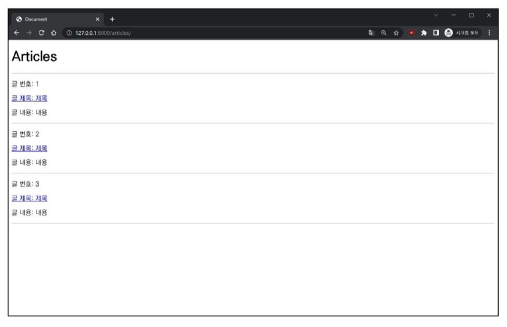

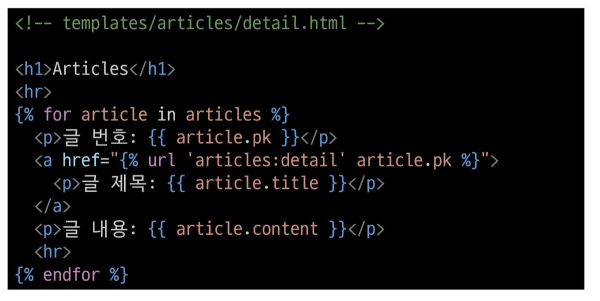

## Create

### Create 로직을 구현하기 위해 필요한 view 함수의 갯수는?
1. new : 사용자 입력 데이터를 받을 페이지를 렌더링
2. create : 사용자가 입력한 요청 데이터를 받아 DB에 저장

### new 기능 구현
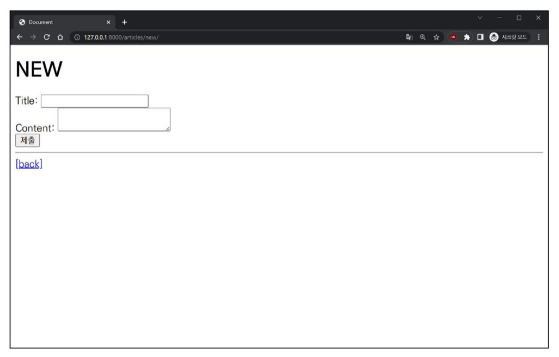

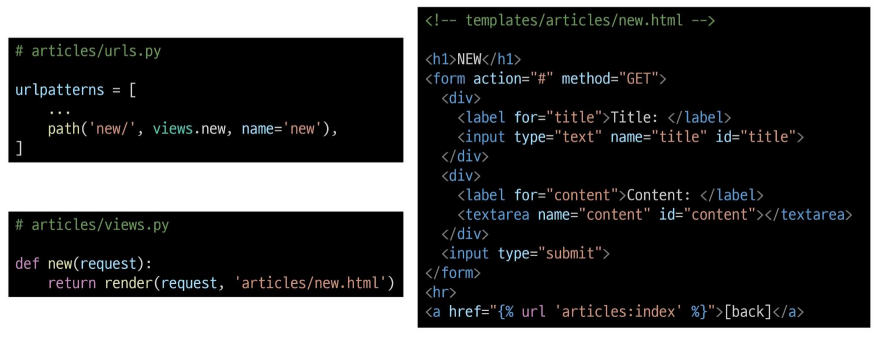

메인 페이지에 new 페이지로 이동할 수 있는 하이퍼링크 작성

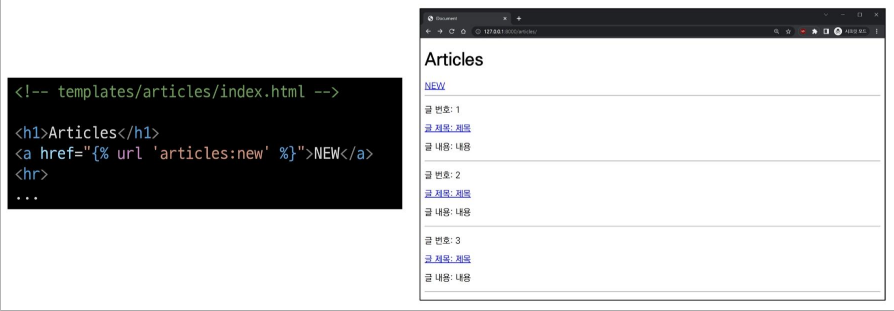

### create 기능 구현
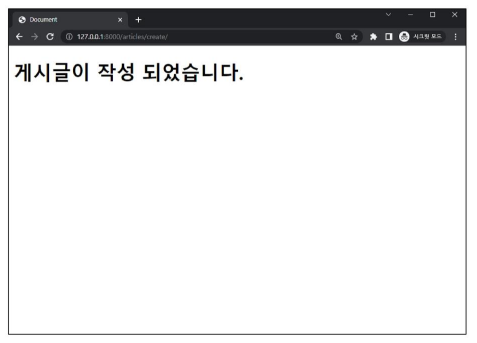

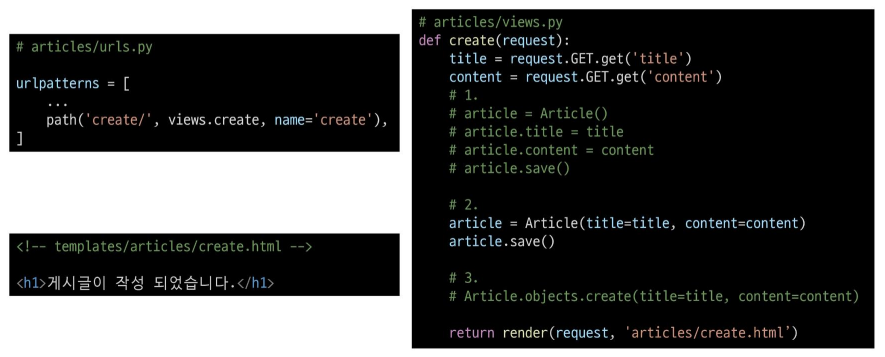

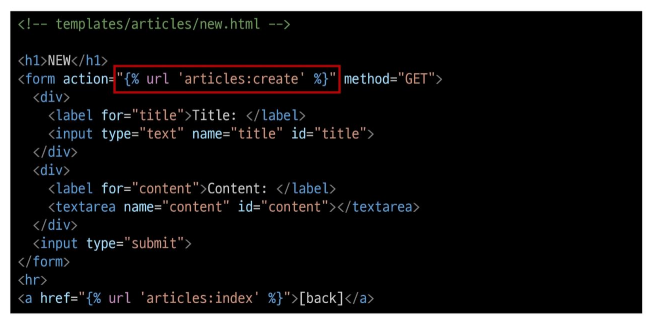

## HTTP request methods

### HTTP
네트워크 상에서 데이터(리소스)를 주고 받기위한 약속

### HTTO request methods
- 데이터에 대해 수행을 원하는 작업(행동)을 나타내는 것
    - 서버에게 원하는 작업의 종류를 알려주는 역할
- 클라이언트가 웹 서버에 특정 동작을 요청하기 위해 사용하는 표준 명령어
- 대표 메서드
    - GET, POST

### GET method

#### `GET` Method
서버로부터 데이터를 요청하고 받아는 데(조회) 사용

#### `GET` Method 특징
1. 데이터 전송
    - URL의 쿼리 문자열(Query String)을 통해 데이터를 전송
    - http://127.0.0.1.8000/articles/create/?`title=제목&content=내용`

2. 데이터 제한
    - URL 길이의 제한이 있어 대량의 데이터 전송에는 적합하지 않음

3. 브라우저 히스토리
    - 요청 URL이 브라우저 히스토리에 남음

4. 캐싱
    - 브라우저는 GET 요청의 응답을 로컬에 저장할 수 있음
    - 동일한 URL로 다시 요청할 때 서버에 접속하지 않고 저장된 결과를 사용
    - 페이지 로딩 시간을 크게 단축

#### `GET` Method 사용 예시
- 검색 쿼리 전송
- 웹 페이지 요청
- API에서 데이터 조회

### POST method

#### `POST` Method
서버에 데이터를 제출하여 리소스를 `변경(생성, 수정, 삭제)`하는 데 사용

#### `POST` Method 특징
1. 데이터 전송
    - HTTP Body를 통해 데이터를 전송

2. 데이터 제한
    - GET에 비해 더 많은 양의 데이터를 전송할 수 있음

3. 브라우저 히스토리
    - POST 요청은 브라우저 히스토리에 남지 않음

4. 캐싱
    - POST 요청은 기본적으로 캐시 할 수 없음
    - POST 요청이 일반적으로 서버의 상태를 변경하는 작업을 수행하기 때문

#### 'POST' Method 사용 예시
- 로그인 정보 제출
- 파일 업로드
- 새 데이터 생성 (ex. 새 게시글 작성)
- API에서 데이터 변경 요청

### `GET` & `POST` Method 정리
- GET과 POST는 각각의 특성에 맞게 적절히 사용해야 함
- GET
    - 데이터 조회
- POST
    - 데이터 생성, 수정에 주로 사용

## HTTP response status code

### HTTP response status code
서버가 클라이언트의 요청에 대한 처리 결과를 나타내는 3자리 숫자

### HTTP response status code의 역할
- 클라이언트에게 요청 처리 결과를 명확히 전달
- 문제 발생 시 디버깅에 도움
- 웹 애플리케이션의 동작을 제어하는 데 사용

#### 403 Forbidden
서버에 요청이 전달되었지만, 권한 때문에 거절되었다는 것을 의미

#### 거절 된 이유
`CSRF token이 누락되었다` 라는 응답

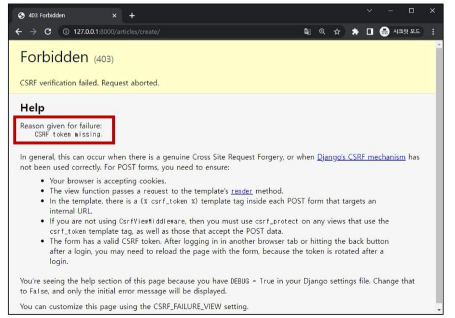

### CSRF

#### CSRF
Cross-Site-Request-Forgery : 사이트 간 요청 위조

- 사용자가 자신의 의지와 무관하게 공격자가 의도한 행동을 하여 특정 웹 페이지를 보안에 취약하게 하거나 수정, 삭제 등의 작업을 하게 만드는 공격 방법


#### CSRF Token 적용
- DTL의 csrf-token 태그를 사용해 손쉽게 사용자에게 토큰 값을 부여
- 요청시 토큰 값도 함께 서버로 전송될 수 있도록 하는 것

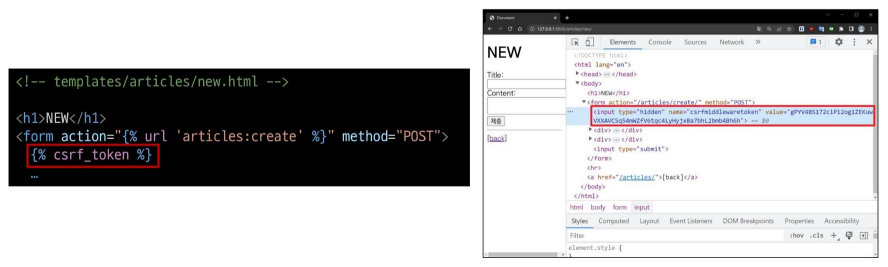

#### 요청 시 CSRF Token을 함꼐 보내야 하는 이유
- Django 서버는 해당 요청이 DB에 데이터를 하나 생성하는(DB에 영향을 주는) 요청에 대해 `Django가 직접 제공한 페이지에서 데이터를 작성하고 있는 것인지`에 대한 확인 수단이 필요한 것
- 겉모습이 똑같은 위조 사이트나 정상적이지 않은 요청에 대한 방어 수단
- 기존
    - 요청 데이터 > 게시글 작성
- 변경
    - 요청 데이터 + 인증 토큰 > 게시글 작성

#### 그런데 왜 POST일 때만 Token을 확인할까?
- POST는 단순 조회를 위한 GET과 달리 특정 리소스에 변경(생성, 수정, 삭제)을 요구하는 의미와 기술적인 부분을 가지고 있기 때문
- DB에 조작을 가하는 요청은 반드시 인증 수단이 필요
- > 데이터베이스에 대한 변경사항을 만드는 요청이기 때문에 토큰을 사용해 최소한의 신원을 확인하는 것

### 게시글 작성 결과
- 게시글 생성 후 개발자 도구를 사용해 Form Data가 전송되는 것 확인
- 더 이상 URL에 Query String 형태로 보냈던 데이터가 표기되지 않음

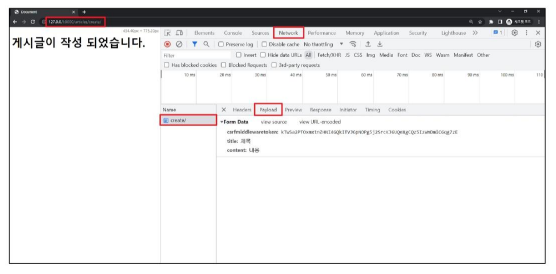

## Redirect

### 게시글 작성 후 완료를 알리는 페이지를 응답한다 ?
게시글을 `조회해줘` 라는 요청이 아닌 `작성해줘` 라는 요청이기 때문에 게시글 저장 후 페이지를 응답하는 것은 POST 요청에 대한 적절한 응답이 아님

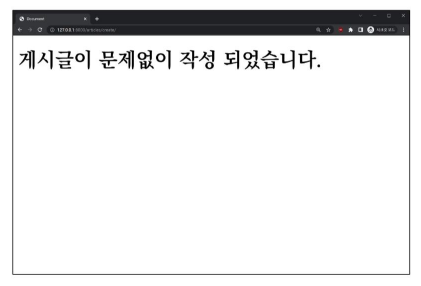

### 서버는 데이터 저장 후 페이지를 응답하는 것이 아닌 사용자를 적절한 기존 페이지로 보내야 한다.
`사용자를 보낸다.` > 사용자가 GET 요청을 한 번 더 보내도록 해야한다.
- 실제로 서버가 클라이언트를 직접 다른 페이지로 보내는 것이 아닌 클라이언트가 GET 요청을 한 번 더 보내도록 응답하는 것

### redirect()
클라이언트가 인자에 작성된 주소로 다시 요청을 보내도록 하는 함수

### redirect() 함수 적용
create view 함수 변경

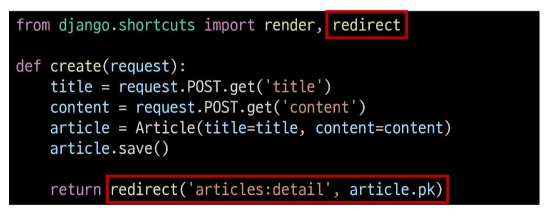

### redirect 동작 원리
1. redirect 응답을 받은 클라이언트는 detail url로 다시 요청을 보내게 됨
2. 결과적으로 detail view 함수가 호출되어 detail view 함수의 반환 결과인 detail 페이지를 응답 받게 되는 것

- > 결국 사용자는 게시글 작성 후 작성된 게시글의 detail 페이지로 이동하는 것으로 느끼게 됨

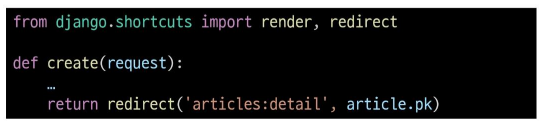

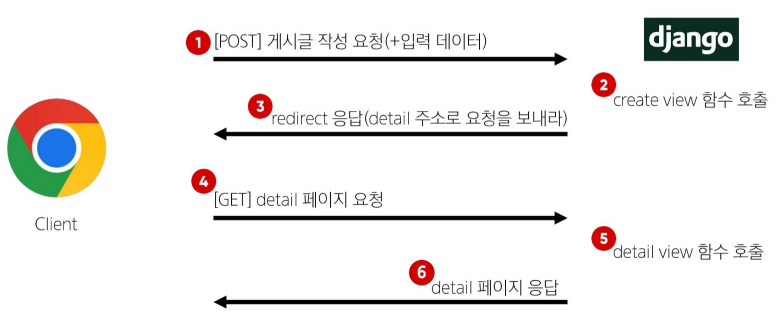

### 게시글 작성 결과
- 게시글이 작성된 후 생성된 게시글의 detail 페이지로 redirect 되었는지 확인
- create 요청 이후에 detail로 다시 요청을 보냈다는 것을 알 수 있음

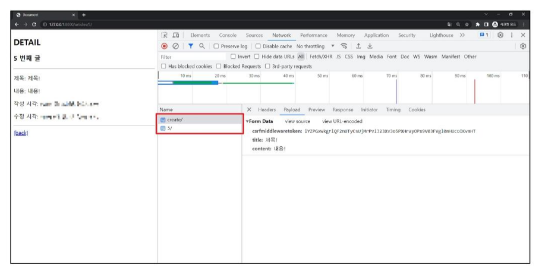

## Delete

### Delete 기능 구현
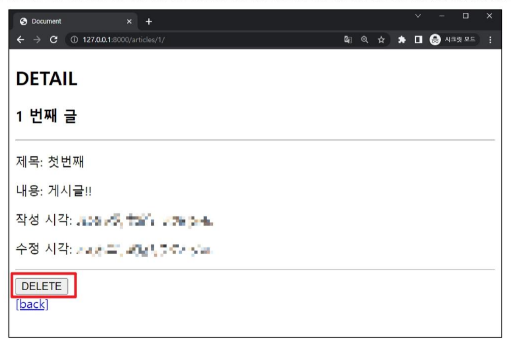

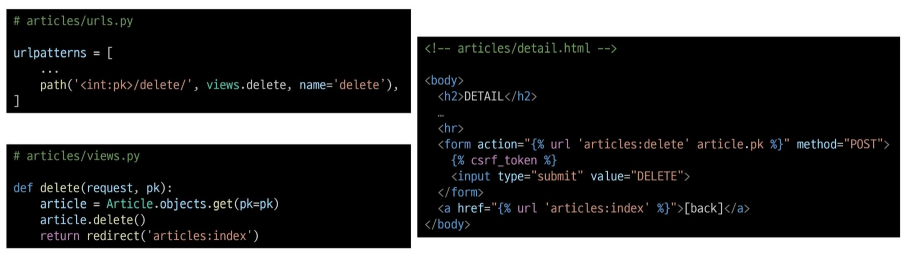

## Update

### Update 로직을 구현하기 위해 필요한 view 함수의 갯수는?
1. 사용자 입력을 받을 페이지 렌더링 : edit
2. 사용자가 입력한 데이터를 받아 DB에 저장 : update

### edit 기능 구현
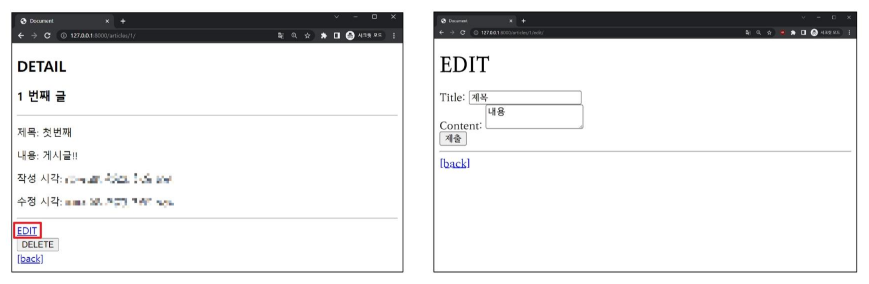

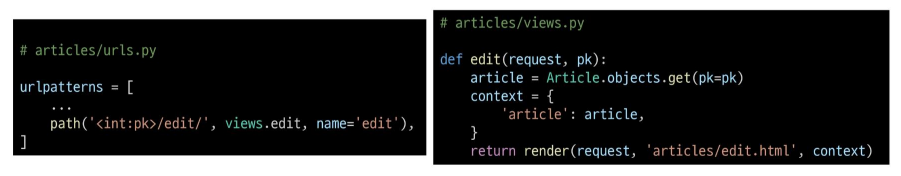

수정 시 이전 데이터가 출력 될 수 있도록 작성하기

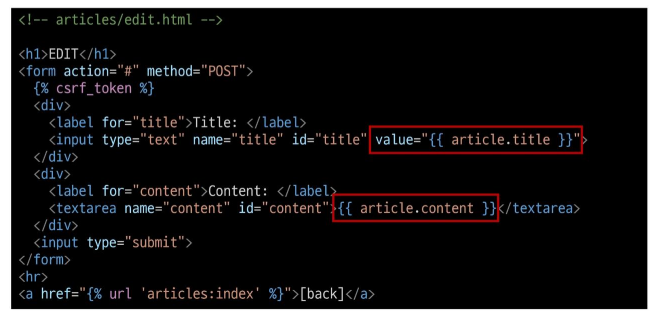

edit 페이지로 이동하기 위한 하이퍼링크 작성

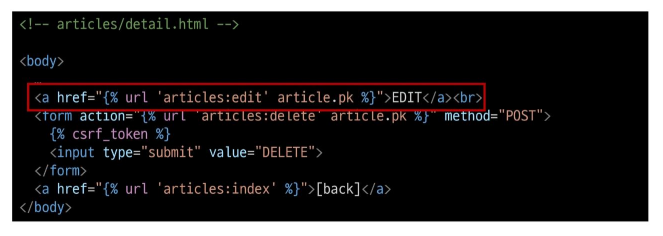

### update 기능 구현
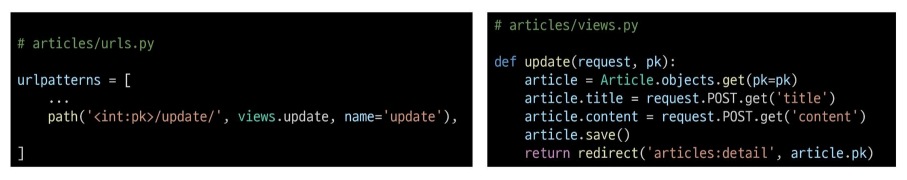

작성 후 게시글 수정 테스트

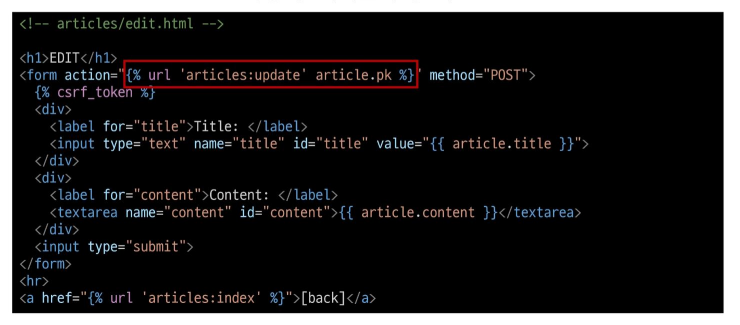

## Reference

### GET & POST

#### GET 과 POST
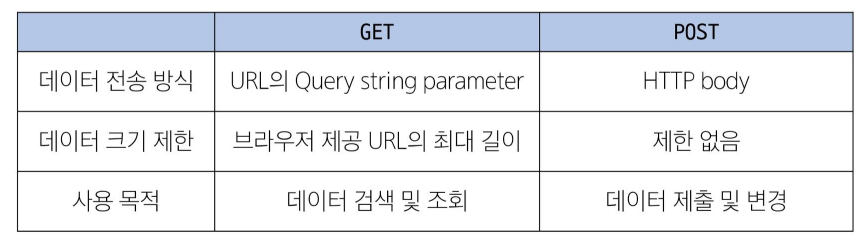

#### GET 요청이 필요한 경우
- 캐싱 및 성능
    - GET 요청은 캐시(Cache)될 수 있고, 이전에 요청한 정보를 새로 요청하지 않고 사용할 수 있음
    - 특히, 동일한 검색 결과를 여러 번 요청하는 경우 GET 요청은 캐시를 활용하여 더 빠르게 응답할 수 있음
- 가시성 및 공유
    - GET 요청은 URL에 데이터가 노출되어 있기 때문에 사용자가 해당 URL을 북마크 하거나 다른 사람과 공유하기 용이
- RESTful API 설계
    - HTTP 메서드의 의미에 따라 동작하도록 디자인된 API의 일관성을 유지할 수 있음

#### HTTP requset methods를 활용한 효율적인 URL 구성
동일한 URL 한 개로 method에 따라 서버에 요구하는 행동을 다르게 요구. Django 후반기 RESTful API 시간에 다룰 예정

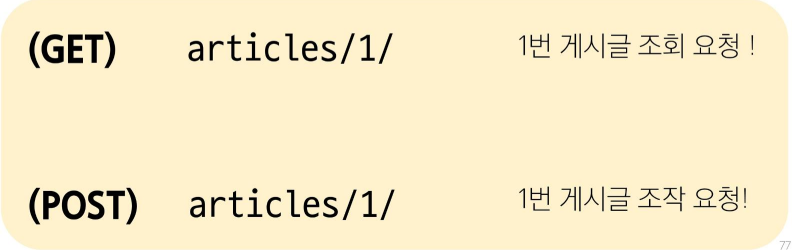

#### HTTP request methods 실제 활용 예시
TMDB API 가이드 문서 예시

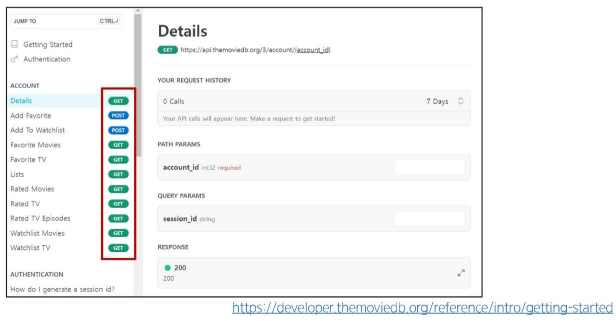

### Cache

#### 캐시(Cache)
- 데이터나 정보를 임시로 저장해두는 메모리나 디스크 공간
- 이전에 접근한 데이터를 빠르게 검색하고 접근할 수 있도록 함